In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
from PIL import Image
import seaborn as sb

%matplotlib inline

Get Data

In [2]:
patientData = pd.read_csv('patient-charges.csv')

In [3]:
patientData.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Visualize Data

In [4]:
patientData.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


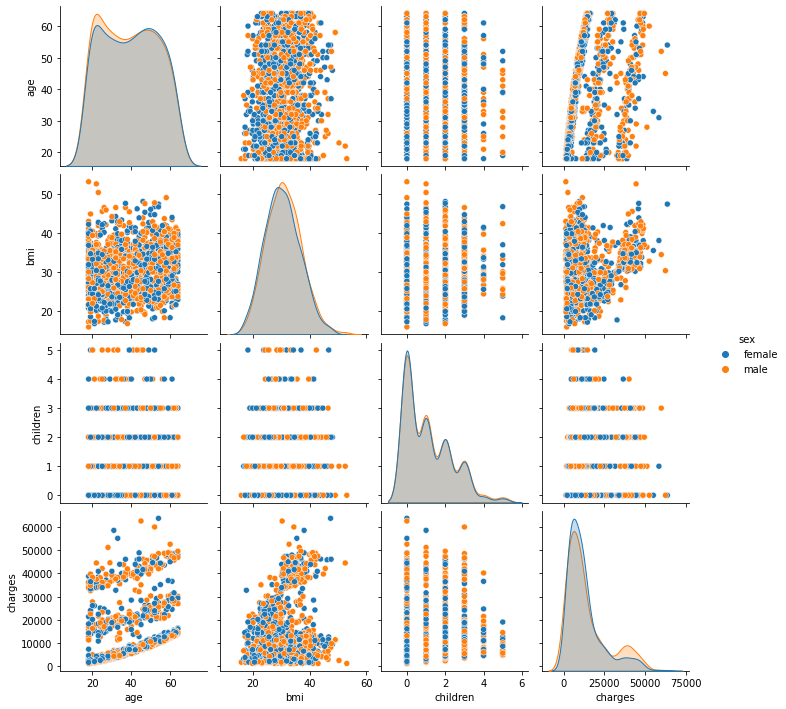

In [ ]:
sb.pairplot(patientData, hue = 'sex')

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

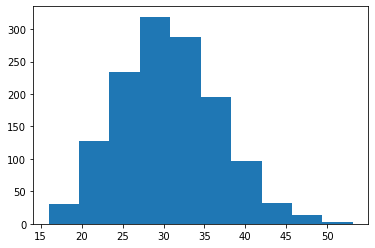

In [5]:
plt.hist(patientData['bmi'])

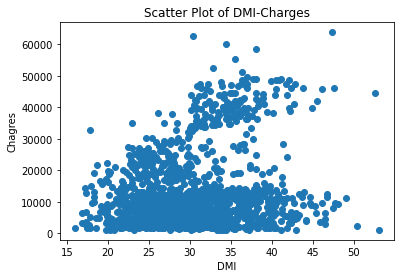

In [ ]:
plt.title("Scatter Plot of DMI-Charges")
plt.xlabel("DMI")
plt.ylabel("Chagres")

plt.scatter(patientData.iloc[:, 2].values, patientData.iloc[:, 6].values)
plt.savefig("Scatter Plot of DMI-Charges.jpeg")

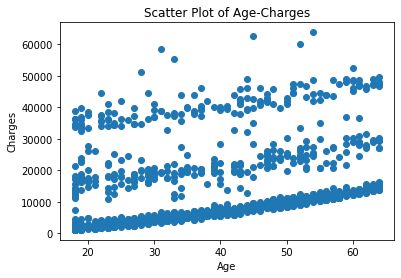

In [ ]:
plt.title("Scatter Plot of Age-Charges")
plt.xlabel("Age")
plt.ylabel("Charges")

plt.scatter(patientData.iloc[:, 0].values, patientData.iloc[:, 6].values)
plt.savefig("Scatter Plot of Age-Charges.jpeg")

Update Data

In [6]:
patientData2 = patientData.drop(patientData[patientData['bmi'] < 25].index)
patientData2.drop(patientData2[patientData['bmi'] > 35].index,inplace = True)

C:\Users\Pranam\AppData\Local\Temp/ipykernel_5256/1110652371.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  patientData2.drop(patientData2[patientData['bmi'] > 35].index,inplace = True)


(array([72., 67., 82., 92., 73., 91., 76., 78., 80., 66.]),
 array([25.   , 25.996, 26.992, 27.988, 28.984, 29.98 , 30.976, 31.972,
        32.968, 33.964, 34.96 ]),
 <BarContainer object of 10 artists>)

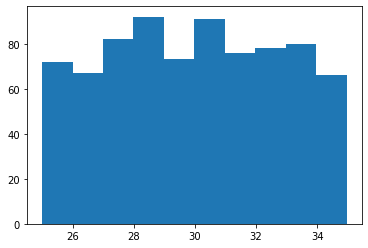

In [7]:
plt.hist(patientData2['bmi'])

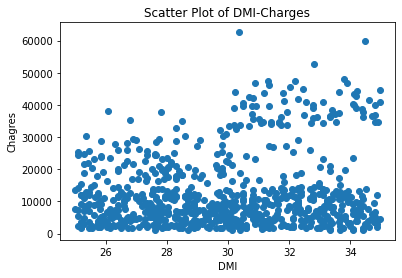

In [8]:
plt.title("Scatter Plot of DMI-Charges")
plt.xlabel("DMI")
plt.ylabel("Chagres")

plt.scatter(patientData2.iloc[:, 2].values, patientData2.iloc[:, 6].values)
plt.savefig("Scatter Plot of DMI-Charges_ProcessedData.jpeg")

Create a DistanceMatrix

In [10]:
DistanceMatrix = patientData.iloc[:, [0, 6]].values

In [ ]:
DistanceMatrix

array([[1.90000000e+01, 1.68849240e+04],
       [1.80000000e+01, 1.72555230e+03],
       [2.80000000e+01, 4.44946200e+03],
       ...,
       [1.80000000e+01, 1.62983350e+03],
       [2.10000000e+01, 2.00794500e+03],
       [6.10000000e+01, 2.91413603e+04]])

In [ ]:
len(DistanceMatrix)

1338

In [9]:
DistanceMatrix2 = patientData2.iloc[:, [2, 6]].values

Create Dendogram

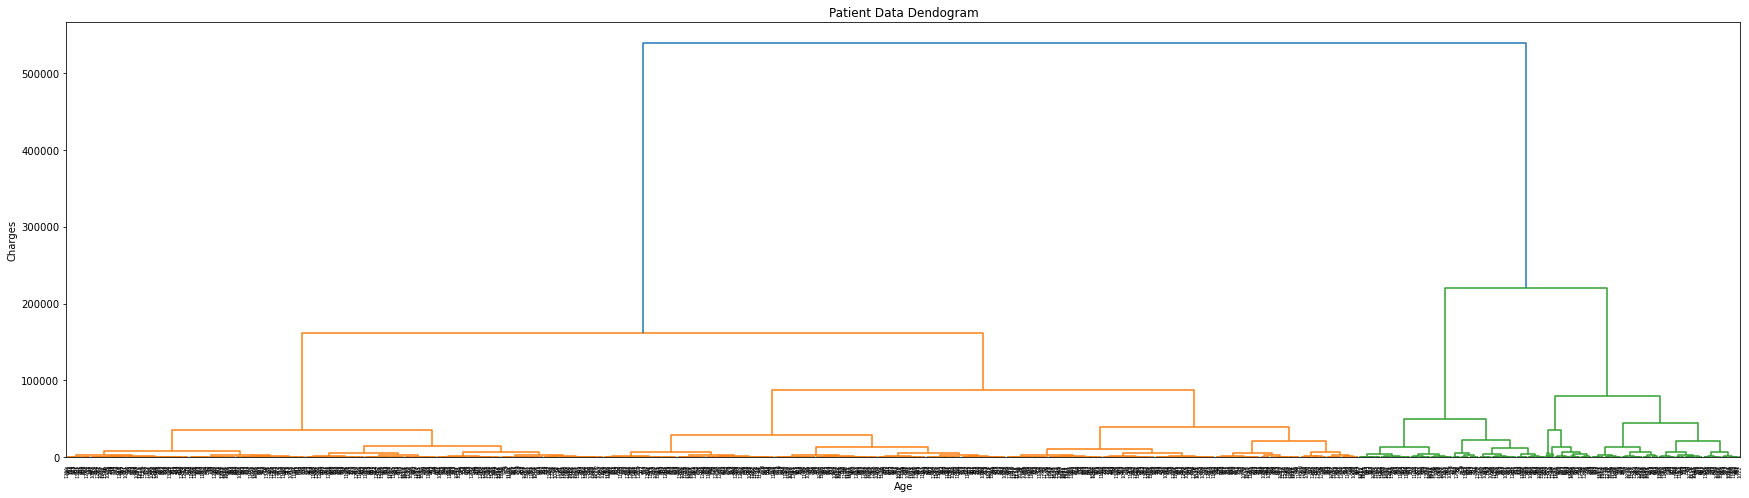

In [11]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.title("Patient Data Dendogram")
plt.ylabel("Charges")
plt.xlabel("Age")
plt.xticks(fontsize = 2, rotation = 90)

Dendogram = hc.dendrogram(hc.linkage(DistanceMatrix, method = 'ward'))
plt.savefig('Dendogram according to Age and Charges.jpeg')

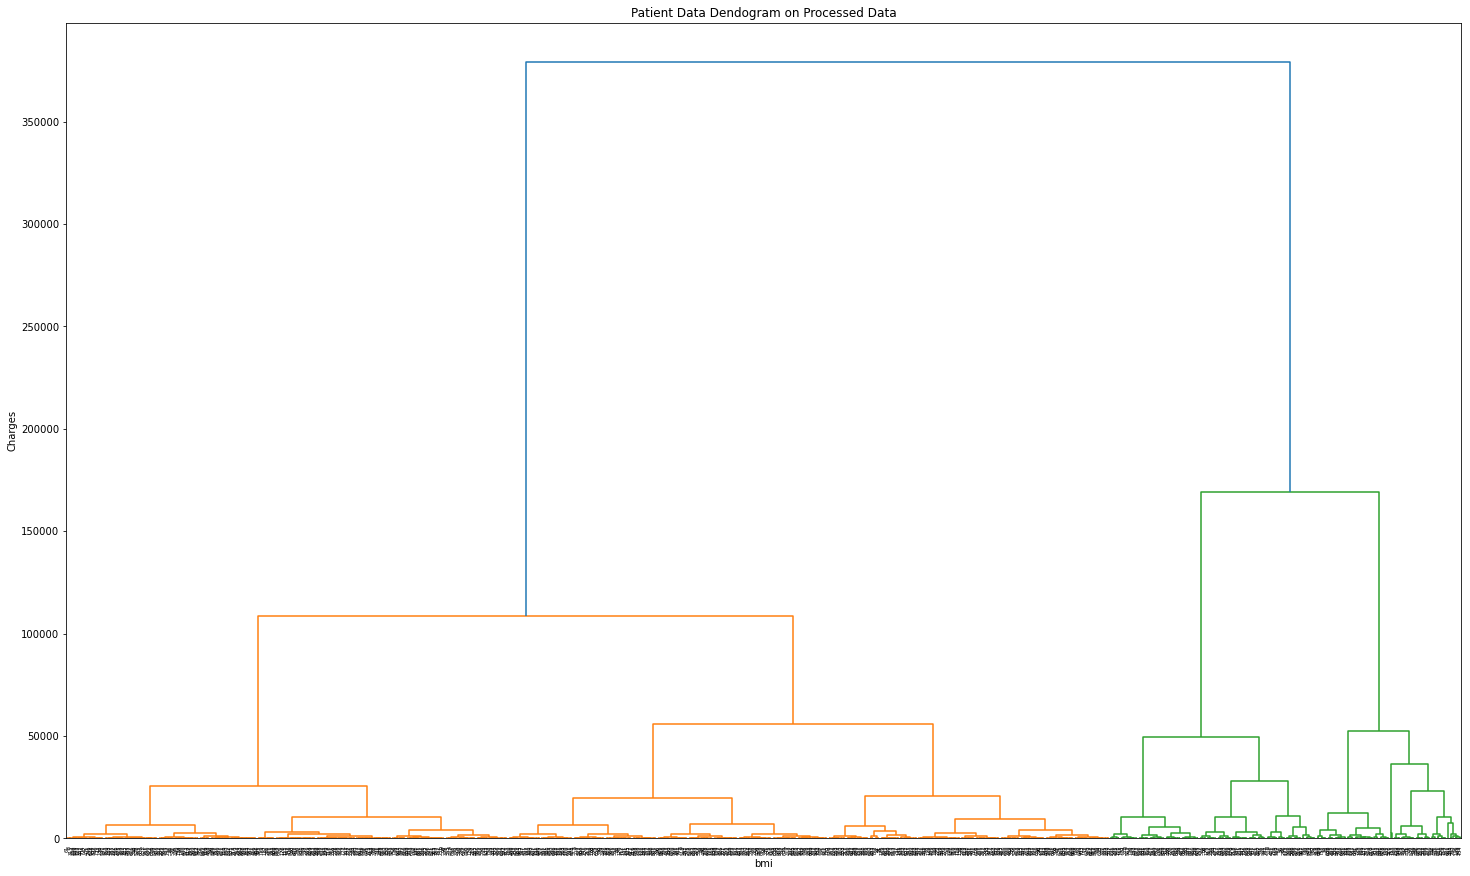

In [12]:
fig, ax = plt.subplots(figsize = (25, 15))
plt.title("Patient Data Dendogram on Processed Data")
plt.ylabel("Charges")
plt.xlabel("bmi")
plt.xticks(fontsize = 2, rotation = 90)

Dendogram = hc.dendrogram(hc.linkage(DistanceMatrix2, method = 'ward'))
plt.savefig('Dendogram according to bmi and Charges_ProcessedData.jpeg')

Train the Clustering Model

In [14]:
AHC = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='ward')
Predictions = AHC.fit_predict(DistanceMatrix)

In [16]:
AHC = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='ward')
Predictions = AHC.fit_predict(DistanceMatrix2)

In [ ]:
Predictions

array([1, 3, 3, ..., 3, 3, 0])

Visualize the Clusters

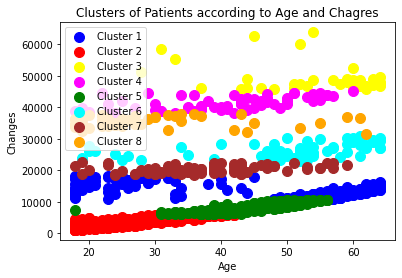

In [15]:
plt.scatter(DistanceMatrix[Predictions == 0, 0], DistanceMatrix[Predictions == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(DistanceMatrix[Predictions == 1, 0], DistanceMatrix[Predictions == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(DistanceMatrix[Predictions == 2, 0], DistanceMatrix[Predictions == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(DistanceMatrix[Predictions == 3, 0], DistanceMatrix[Predictions == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(DistanceMatrix[Predictions == 4, 0], DistanceMatrix[Predictions == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(DistanceMatrix[Predictions == 5, 0], DistanceMatrix[Predictions == 5, 1], s = 100, c = 'cyan', label = 'Cluster 6')
plt.scatter(DistanceMatrix[Predictions == 6, 0], DistanceMatrix[Predictions == 6, 1], s = 100, c = 'brown', label = 'Cluster 7')
plt.scatter(DistanceMatrix[Predictions == 7, 0], DistanceMatrix[Predictions == 7, 1], s = 100, c = 'orange', label = 'Cluster 8')

plt.title("Clusters of Patients according to Age and Chagres")
plt.ylabel("Changes")
plt.xlabel("Age")
plt.legend()

plt.savefig('Clusters of Patients according to Age and Chagres_8 Clusters.jpeg')

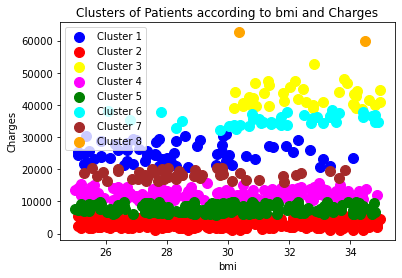

In [18]:
plt.scatter(DistanceMatrix2[Predictions == 0, 0], DistanceMatrix2[Predictions == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(DistanceMatrix2[Predictions == 1, 0], DistanceMatrix2[Predictions == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(DistanceMatrix2[Predictions == 2, 0], DistanceMatrix2[Predictions == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(DistanceMatrix2[Predictions == 3, 0], DistanceMatrix2[Predictions == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(DistanceMatrix2[Predictions == 4, 0], DistanceMatrix2[Predictions == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(DistanceMatrix2[Predictions == 5, 0], DistanceMatrix2[Predictions == 5, 1], s = 100, c = 'cyan', label = 'Cluster 6')
plt.scatter(DistanceMatrix2[Predictions == 6, 0], DistanceMatrix2[Predictions == 6, 1], s = 100, c = 'brown', label = 'Cluster 7')
plt.scatter(DistanceMatrix2[Predictions == 7, 0], DistanceMatrix2[Predictions == 7, 1], s = 100, c = 'orange', label = 'Cluster 8')
# plt.scatter(DistanceMatrix2[Predictions == 8, 0], DistanceMatrix2[Predictions == 8, 1], s = 100, c = 'magenta', label = 'Cluster 9')
# plt.scatter(DistanceMatrix2[Predictions == 9, 0], DistanceMatrix2[Predictions == 9, 1], s = 100, c = 'green', label = 'Cluster 10')
# plt.scatter(DistanceMatrix2[Predictions == 10, 0], DistanceMatrix2[Predictions == 10, 1], s = 100, c = 'cyan', label = 'Cluster 11')
# plt.scatter(DistanceMatrix2[Predictions == 11, 0], DistanceMatrix2[Predictions == 11, 1], s = 100, c = 'brown', label = 'Cluster 12')
# plt.scatter(DistanceMatrix2[Predictions == 12, 0], DistanceMatrix2[Predictions == 12, 1], s = 100, c = 'orange', label = 'Cluster 13')

plt.title("Clusters of Patients according to bmi and Charges")
plt.ylabel("Charges")
plt.xlabel("bmi")
plt.legend()

plt.savefig('Clusters of Patients according to bmi and Chagres_8 Clusters_ProcessedData.jpeg')